# **Predicting E-commerce Customer Spend**
---
## **Business Problem**

The company wants to **predict how much a customer will spend in a year** based on their behavior and membership length.
This helps identify key spending drivers and improve retention strategies.

---

## **Customer Journey**
**1. Book Session**
- Customer books an in-store style session.
- This adds to their **Avg. Session Length**.

**2. Complete Purchase**
- The purchase happens through the **mobile app** or **website**.
- Time spent is logged under **Time on App** and **Time on Website**.

**3. Membership Grows**
- The customer's **Length of Membership** increases over time.

**4. Data Collected**
- The following are tracked for each customer:
  - `Avg. Session Length`
  - `Time on App`
  - `Time on Website`
  - `Length of Membership`

> 📌 Note: All personal data is fictional.

---

## **Project Objective**

Build a machine learning model to predict **Yearly Amount Spent** using customer behavior data.

**Model Goals:**
- Identify high-value customers
- Understand how membership affects spending
- Guide investment (e.g. app vs. website)
- Support retention planning

---

## **Step 1: Load and Inspect the Data**
We start by loading the dataset and checking its structure.

**Dataset Summary:**
- File: Ecommerce Customers.csv
- Rows: 500
- Columns: 8
- No missing values

**Quick Stats:**
- Spending ranges from **\$ 256.67** to **\$765.52**
- Key features: Session Length, App Time, Website Time, Membership Length

In [3]:
# Import Libraries
import pandas as pd  # data handling
import matplotlib.pyplot as plt  # plotting
import seaborn as sns  # visualizations
import pylab  # for Q-Q plots
import scipy.stats as stats  # for statistical analysis

# Scikit-learn modules
from sklearn.model_selection import train_test_split  # train/test splitting
from sklearn.linear_model import LinearRegression  # linear model
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error  # model evaluation

In [4]:
# Load the Dataset
df = pd.read_csv('Ecommerce Customers.csv')

In [5]:
# Initial Data Check
df.head()  # preview first few rows

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [6]:
df.info()  # check column types and nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [7]:
df.describe()  # summary statistics

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## **Step 2: Exploratory Data Analysis**
We use scatterplots and trend lines to study relationships between features and spending.

**Key Observations:**
- Length of Membership shows strong correlation with spending
- Time on App has a moderate positive relationship
- Session Length and Website Time show little or no impact

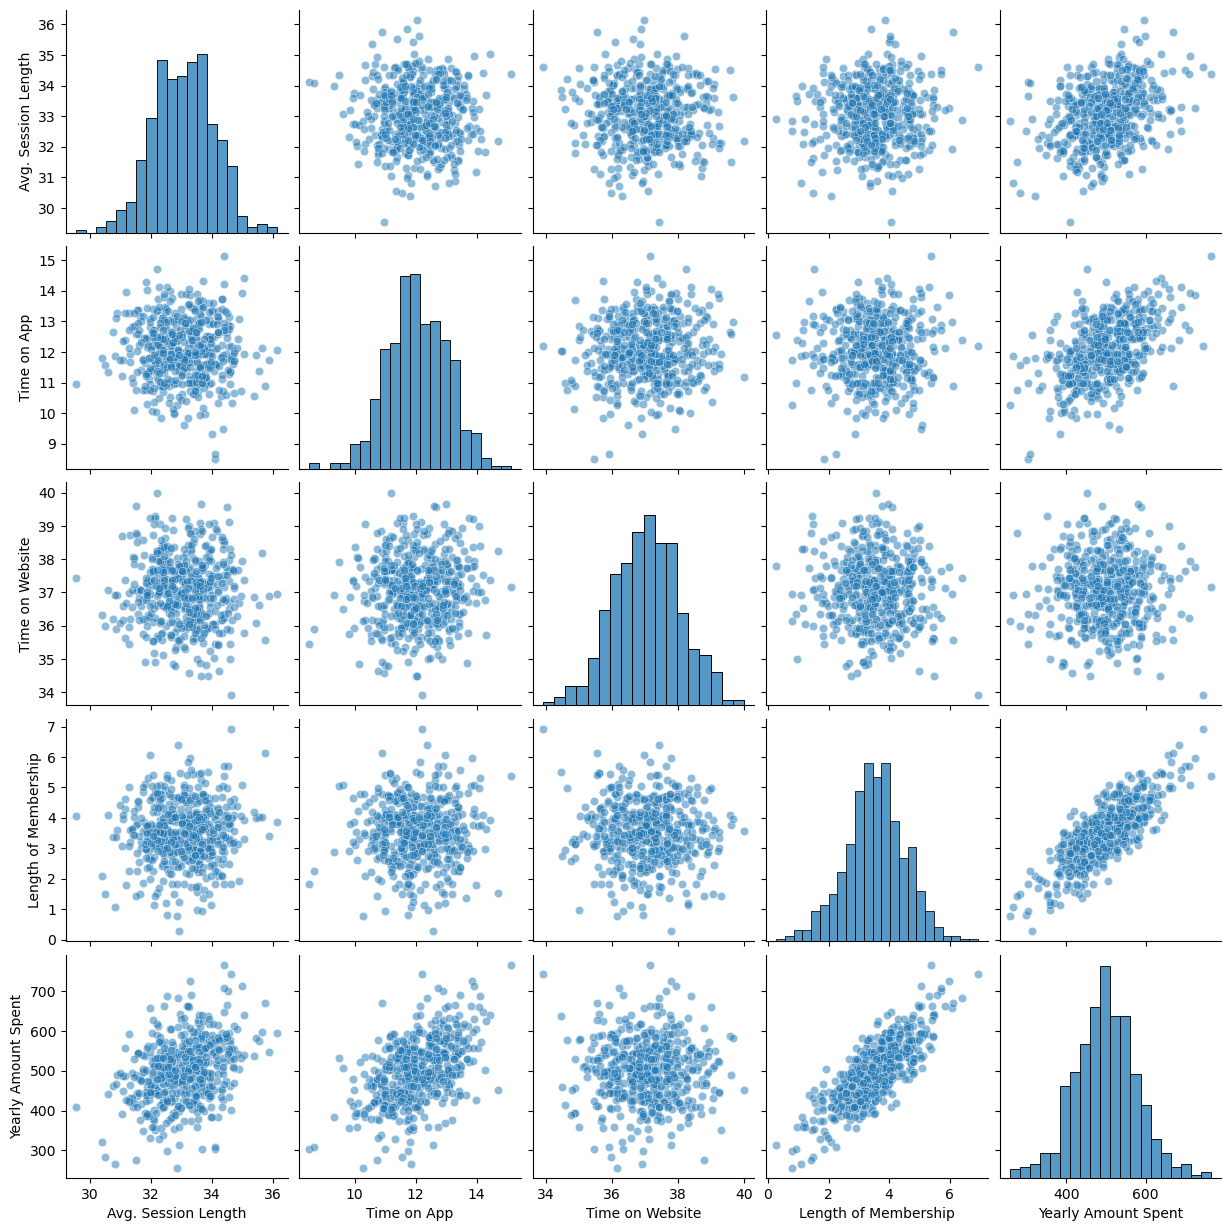

In [9]:
# Exploratory Data Analysis (EDA)
sns.pairplot(data=df, kind='scatter', plot_kws={'alpha': 0.5})  # pairwise scatter plots

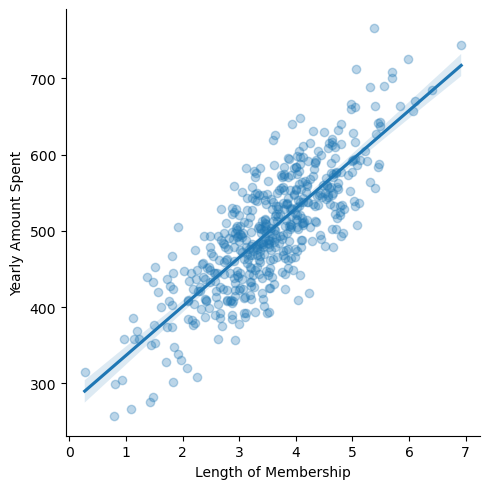

In [10]:
# Membership vs. Spending - scatter + regression line
sns.lmplot(data=df,
           x='Length of Membership',
           y='Yearly Amount Spent',
           scatter_kws={'alpha': 0.3})

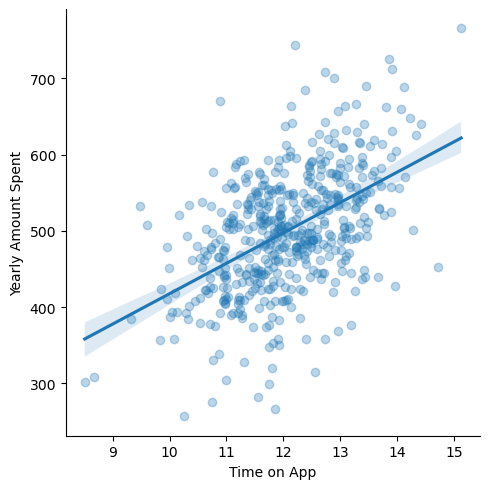

In [11]:
# Time on app vs. Spending - scatter + regression line
sns.lmplot(data=df,
           x='Time on App',
           y='Yearly Amount Spent',
           scatter_kws={'alpha': 0.3})

## **Step 3: Model Preparation and Training**
### 1. Define Features and Target
- Features (X): Session Length, App Time, Website Time, Membership Length
- Target (y): Yearly Amount Spent

### 2. Split the Data

- Training: 70%
- Testing: 30%
- random_state=0 ensures reproducibility

### 3. Train the Model
- We use **Linear Regression** from scikit-learn
- The model learns how each feature influences spending

In [13]:
# Prepare Data for Modeling
X = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = df['Yearly Amount Spent']

In [14]:
# Split data: 70% train, 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [15]:
# Train Linear Regression Model
# =======================================
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## **Step 4: Assess the Model**
### Intercept and Coefficients:
Shows how much each feature affects spending.

### Model Score (R²):
Tells how much of the variation in spending is explained by the model.

### Evaluation Metrics:
- Mean Absolute Error (MAE)
- Mean Squared Error (MSE)
- Root Mean Squared Error (RMSE)

### Prediction Plot:
A scatterplot compares predicted vs. actual spending.
A red line shows perfect predictions for reference.

In [17]:
# Evaluate Model Coefficients
intercept = model.intercept_
coefficients = model.coef_
feature_names = X.columns

print(f"Intercept: {intercept:.3f}")
for coef, name in zip(coefficients, feature_names):
    print(f"{name}: {coef:.3f}")

Intercept: -1037.826
Avg. Session Length: 25.768
Time on App: 38.800
Time on Website: -0.018
Length of Membership: 61.853


In [18]:
# Model Score (R²)
# =======================================
print("R^2 Score:", model.score(X, y))

R^2 Score: 0.9842659226064209


In [19]:
# Predict on Test Set
predictions = model.predict(X_test)
predictions

array([438.05361824, 489.88569198, 370.69103491, 514.760391  ,
       496.7189217 , 451.55278137, 457.78867583, 336.67939991,
       527.81474016, 663.59455653, 559.9744863 , 526.04623292,
       551.99421026, 456.63948791, 450.23568445, 432.06183962,
       563.23217826, 408.88887454, 599.34396339, 486.90344586,
       715.98855998, 496.94092608, 411.57431473, 555.98451537,
       550.67872493, 398.39939771, 420.89896272, 395.80398185,
       548.01986143, 463.57065873, 558.50166416, 505.04153589,
       505.69744364, 463.9745016 , 425.90773104, 400.61232527,
       503.64365781, 430.32931831, 570.24273703, 422.00772918,
       487.84508367, 602.03000651, 615.86576796, 589.22540325,
       449.89751618, 379.99185043, 558.51374868, 462.84914541,
       502.36523082, 401.25888527, 524.46131262, 416.58817719,
       576.56973214, 477.79844616, 456.89273381, 398.0612513 ,
       564.95710004, 305.11202178, 562.18988371, 477.14131612,
       498.70567984, 434.25965119, 464.87939435, 577.22

In [20]:
# Performance Metrics
print("Mean Absolute Error:", mean_absolute_error(y_test, predictions))
print("Mean Squared Error:", mean_squared_error(y_test, predictions))
print("Root Mean Squared Error:", root_mean_squared_error(y_test, predictions))

Mean Absolute Error: 7.8513771708614515
Mean Squared Error: 94.55779479273264
Root Mean Squared Error: 9.724083236620954


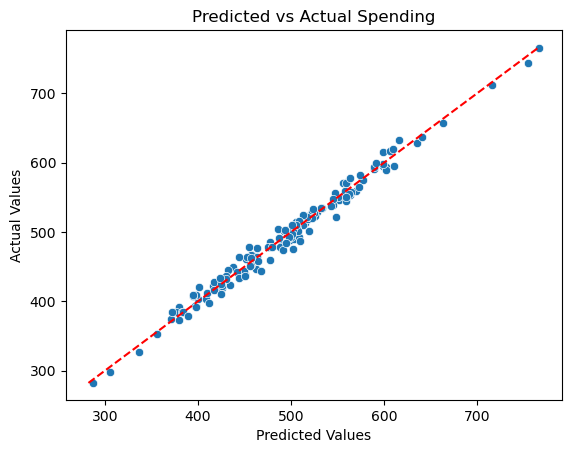

In [21]:
# Scatter Plot: Predicted vs Actual
sns.scatterplot(x=predictions, y=y_test)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Predicted vs Actual Spending')

# 45-degree reference line
min_val = min(predictions.min(), y_test.min())
max_val = max(predictions.max(), y_test.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')
plt.show()

## **Step 5: Residual Analysis**
### What Are Residuals?
They’re the differences between actual and predicted values.

### Distribution Plot:
We check if the residuals are normally distributed using a histogram + KDE.

### Q-Q Plot:
If residuals follow the line, they’re close to a normal distribution—good sign for model fit.

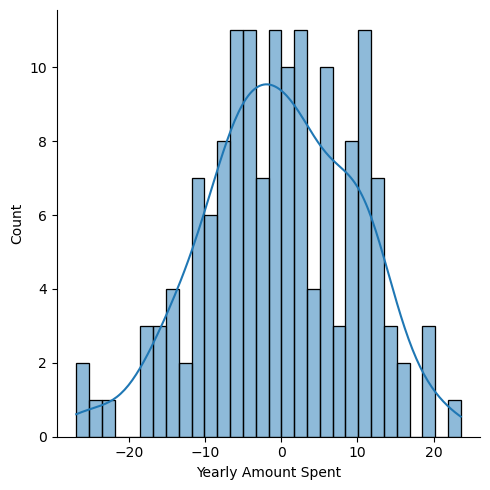

In [23]:
# Residual Analysis
residuals = y_test - predictions
sns.displot(residuals, bins=30, kde=True)  # histogram of residuals

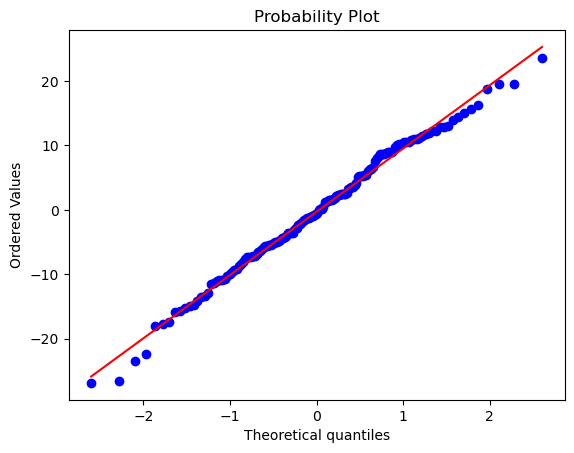

In [24]:
# Q-Q plot for residuals
stats.probplot(residuals, dist='norm', plot=pylab)
pylab.show()

## **📌 Step 6: Interpretation and Conclusions**
### Model Formula
Yearly Amount Spent = **-1037.826** +  
**25.768** × Avg. Session Length +  
**38.800** × Time on App -  
**0.018** × Time on Website +  
**61.853** × Length of Membership

### Coefficient Insights
- Length of Membership → biggest positive effect
- Time on App → strong effect
- Session Length → small positive effect
- Time on Website → no real impact

### Model Performance
- R² Score: 0.984 → explains 98.4% of variation
- MAE: ~$7.85
- RMSE: ~$9.72
- Residuals: Normally distributed → good fit

### Business Takeaways
- App usage is tied to spending → invest in app features
- Longer memberships = more spending → focus on retention
- Website usage has no impact → may need review or de-prioritization

### Conclusion
This model effectively predicts yearly customer spending.
The most important factors are **app engagement** and **membership length** — key areas for business focus.